# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6





Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.

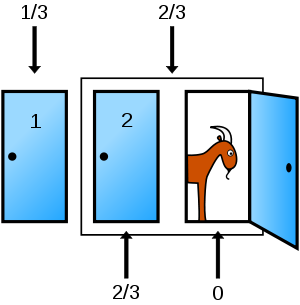






Zaimplementuj symulację paradoksu Monty'ego Halla. Przeprowadź eksperyment losowy, w którym gra zostanie rozegrana określoną liczbę razy (liczbę rozgrywek należy ustawić jako parametr programu).

### Zadanie 1

Symulację należy przeprowadzić w dwóch wariantach:

1. Gracz zawsze zostaje przy pierwotnie wybranej bramce.
2. Gracz zawsze zmienia swój wybór po tym, jak prowadzący ujawni jedną z bramek bez nagrody.

Po zakończeniu symulacji porównaj skuteczność obu strategii.

Odpowiedz na pytanie: **Czy uzyskane wyniki są zgodne z teorią paradoksu Monty'ego Halla?**





In [32]:
import random

doors = [0, 0, 1]
def simulation(sim_num, change_flag = True):
    won = 0
    lost = 0
    for s in range(0, sim_num):
        # print(f"Symulacja nr {s + 1}:")
        random.shuffle(doors)

        player_choose = random.randint(0,2)

        zeros_idx = [i for i, x in enumerate(doors) if x == 0 and i != player_choose]
        open_zero = random.choice(zeros_idx)
        
        # print(f"Player choose: {player_choose}, opened door: {open_zero}")
        if change_flag == True:
            all_indexes = {0, 1, 2}
            left_doors = all_indexes - {player_choose, open_zero}
            player_choose = left_doors.pop()

        if doors.index(1) == player_choose:
            won += 1
        else:
            lost += 1
    # print(won, lost)
    return won, lost

sim_num = 10000
print("Bez zmiany:")
won, lost = simulation(sim_num, change_flag=False)
print(f"Wygrane: {(won/sim_num)*100}%, Przegrane: {(lost/sim_num)*100}%\n")

print("Ze zmianą:")
won, lost = simulation(sim_num, change_flag=True)
print(f"Wygrane: {(won/sim_num)*100}%, Przegrane: {(lost/sim_num)*100}%")


Bez zmiany:
Wygrane: 33.58%, Przegrane: 66.42%

Ze zmianą:
Wygrane: 66.95%, Przegrane: 33.050000000000004%


#### Zadanie 2

Napisz program, który umożliwia przeprowadzenie symulacji paradoksu Monty'ego Halla z dowolną liczbą bramek (możliwość podania tej liczby jako parametr).

Zasady symulacji:

* Gracz losowo wybiera jedną z $N$ bramek.
* Prowadzący odsłania jedną z pozostałych $N - 1$ bramek, za którą na pewno nie ma nagrody.
* Gracz następnie losowo wybiera jedną z pozostałych $N - 2$ bramek (innych niż pierwotny wybór oraz bramka odsłonięta przez prowadzącego).

W przypadku $N = 100$ gracz wybiera jedną ze 100 bramek, prowadzący odsłania jedną (w której nie ma nagrody) z 99 pozostałych, a następnie gracz wybiera losowo jedną z 98 bramek.

Na koniec porównaj skuteczność strategii "pozostania przy wyborze" oraz "zmiany wyboru" (losowej zmiany wśród dostępnych opcji).



In [ ]:
import random

def simulation(sim_num, num_doors=3, change_flag=True):
    won = 0
    lost = 0

    for _ in range(sim_num):
        doors = [0] * num_doors
        doors[random.randint(0, num_doors - 1)] = 1

        player_choose = random.randint(0, num_doors - 1)

        empty_indexes = [i for i, x in enumerate(doors) if x == 0 and i != player_choose]
        open_zero = random.choice(empty_indexes)

        if change_flag:
            all_indexes = set(range(num_doors))
            available_choices = list(all_indexes - {player_choose, open_zero})
            player_choose = random.choice(available_choices)

        if doors[player_choose] == 1:
            won += 1
        else:
            lost += 1

    return won, lost

sim_num = 10000
num_doors = 100

print(f"Symulacja bez zmiany przy {num_doors} drzwiach:")
won, lost = simulation(sim_num, num_doors, change_flag=False)
print(f"Wygrane: {(won / sim_num) * 100:.2f}%, Przegrane: {(lost / sim_num) * 100:.2f}%\n")

print(f"Symulacja ze zmianą przy {num_doors} drzwiach:")
won, lost = simulation(sim_num, num_doors, change_flag=True)
print(f"Wygrane: {(won / sim_num) * 100:.2f}%, Przegrane: {(lost / sim_num) * 100:.2f}%")


Symulacja bez zmiany przy 100 drzwiach:
Wygrane: 0.93%, Przegrane: 99.07%

Symulacja ze zmianą przy 100 drzwiach:
Wygrane: 0.79%, Przegrane: 99.21%


#### Zadanie 3

Przeanalizuj, jak liczba bramek wpływa na prawdopodobieństwo wygranej w każdej ze strategii. Wyświetl wykres przedstawiający prawdopodobieństwo wygranej w zależności od liczby bramek dla obu strategii (jako dwie serie danych).

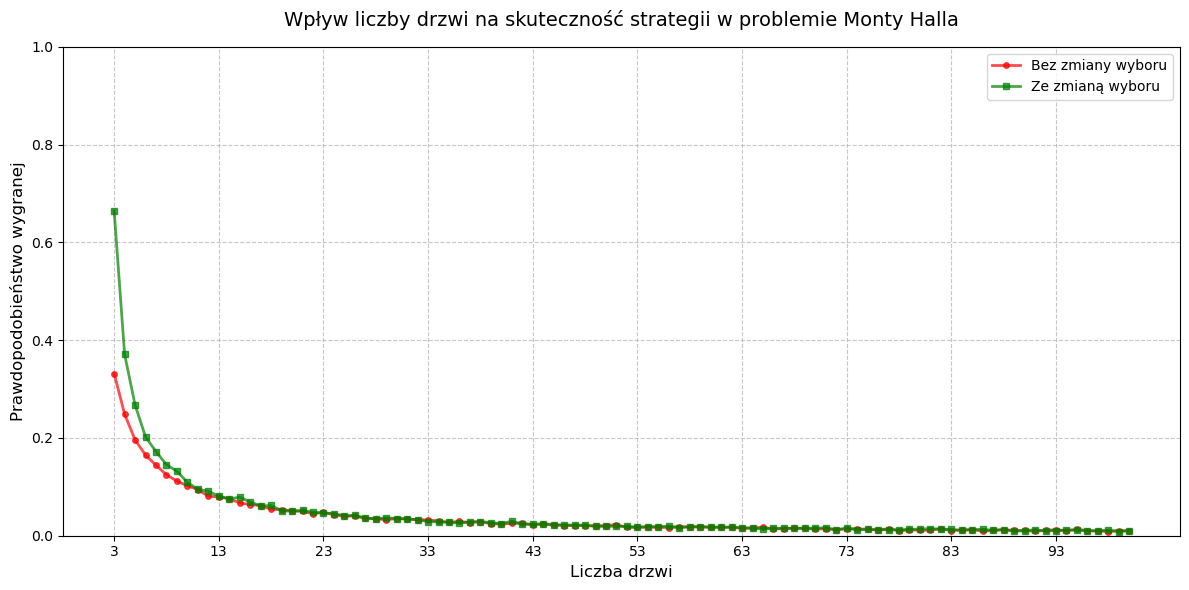

In [ ]:
import matplotlib.pyplot as plt

door_counts = list(range(3, 101))
simulations = 10000

no_change_probs = [simulation(simulations, num_doors=n, change_flag=False) for n in door_counts]
change_probs = [simulation(simulations, num_doors=n, change_flag=True) for n in door_counts]

no_change_win_probs = [won / (won + lost) for won, lost in no_change_probs]
change_win_probs = [won / (won + lost) for won, lost in change_probs]

plt.figure(figsize=(12, 6))
plt.plot(door_counts, no_change_win_probs, label='Bez zmiany wyboru', color='red', linewidth=2, marker='o', markersize=4, alpha=0.7)
plt.plot(door_counts, change_win_probs, label='Ze zmianą wyboru', color='green', linewidth=2, marker='s', markersize=4, alpha=0.7)
plt.xlabel('Liczba drzwi', fontsize=12)
plt.ylabel('Prawdopodobieństwo wygranej', fontsize=12)
plt.title('Wpływ liczby drzwi na skuteczność strategii w problemie Monty Halla', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)  
plt.xticks(range(3, 101, 10)) 
plt.tight_layout()

plt.show()